In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np
import random

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
with open('unique_cards', 'rb') as f:
    unique_cards = pickle.load(f)
    
with open('cleaned_cards', 'rb') as f:
    cleaned_cards = pickle.load(f)
    
with open('big_cards', 'rb') as f:
    big_cards = pickle.load(f)

In [5]:
# pd.set_option('max_columns', None)
# unique_cards.sample(1)

In [6]:
def quick_test(model, X, y):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
    model.fit(xtrain, ytrain)
    return model.score(xtest, ytest)

def quick_test_afew_times(model, X, y, n=10):
    return np.mean([quick_test(model, X, y) for j in range(n)])

In [7]:
def quick_predict(model, X, y):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
    model.fit(xtrain, ytrain)
    return model.predict(xtest), ytest

def quick_probas(model, X, y):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
    model.fit(xtrain, ytrain)
    return model.predict_proba(xtest), ytest

In [8]:
logreg = LogisticRegression(penalty='none')

In [9]:
x = unique_cards.drop(columns = ['Binary_Rank', 'Normal_EDH_Rank', 'name', 'mana_cost', 'type_line', 'oracle_text', 'power', 
                                 'toughness', 'colors', 'color_identity', 'keywords', 'legalities', 'games', 'finishes',
                                 'artist', 'flavor_text', 'prices', 'produced_mana', 'loyalty', 'card_faces', 'life_modifier',
                                 'hand_modifier', 'edhrec_rank', 'penny_rank', 'set', 'set_name', 'set_type', 'rarity',
                                 'released_at', 'double_sided', 'planeswalker', 'makes_mana', 'hand_modify', 'life_modify',
                                 'lands', 'creature', 'enchantment', 'artifact', 'instant', 'sorcery', 'price'])
y = unique_cards.loc[:, 'Binary_Rank']

In [10]:
x = x.fillna(0.0)

In [11]:
lr_score_dirty = quick_test_afew_times(logreg, x, y)
lr_score_dirty = round(lr_score_dirty, 3)

In [12]:
lr_PR_results = quick_probas(logreg, x, y)
lr_y_true = lr_PR_results[1]
lr_probas_pred = lr_PR_results[0]

In [13]:
decisiontree = DecisionTreeClassifier(max_depth=4)
dt_score_dirty = quick_test_afew_times(decisiontree, x, y)
dt_score_dirty = round(dt_score_dirty, 3)

In [14]:
dt_PR_results = quick_probas(decisiontree, x, y)
dt_y_true = dt_PR_results[1]
dt_probas_pred = dt_PR_results[0]

In [15]:
randomforest = RandomForestClassifier(n_estimators=100)
rf_score_dirty = quick_test_afew_times(randomforest, x, y)
rf_score_dirty = round(rf_score_dirty, 3)

In [16]:
rf_PR_results = quick_probas(randomforest, x, y)
rf_y_true = rf_PR_results[1]
rf_probas_pred = rf_PR_results[0]

In [13]:
# Logistic Regression
precision, recall, thresholds = precision_recall_curve(y_true = np.array(lr_y_true), probas_pred = np.array(lr_probas_pred)[:,1])

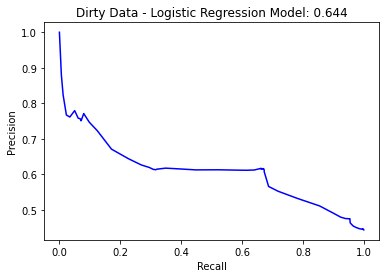

In [14]:
plt.plot(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Dirty Data - Logistic Regression Model: {lr_score_dirty}')
plt.show()

In [19]:
len(lr_probas_pred)

7795

In [19]:
# Decision Tree
precision, recall, thresholds = precision_recall_curve(y_true = np.array(dt_y_true), probas_pred = np.array(dt_probas_pred)[:,1])

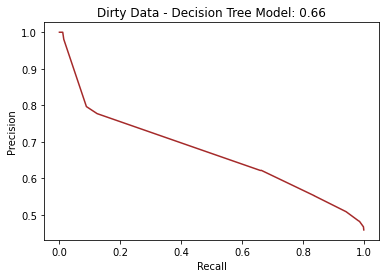

In [20]:
plt.plot(recall, precision, color='brown')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Dirty Data - Decision Tree Model: {dt_score_dirty}')
plt.show()

In [21]:
# Random Forest
precision, recall, thresholds = precision_recall_curve(y_true = np.array(rf_y_true), probas_pred = np.array(rf_probas_pred)[:,1])

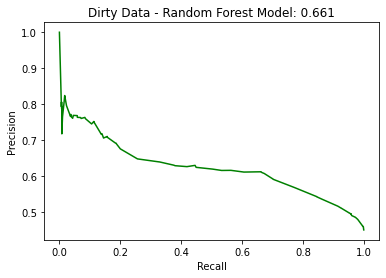

In [22]:
plt.plot(recall, precision, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Dirty Data - Random Forest Model: {rf_score_dirty}')
plt.show()

In [23]:
x1 = unique_cards.drop(columns = ['Binary_Rank', 'Normal_EDH_Rank', 'name', 'mana_cost', 'type_line', 'oracle_text', 'power', 
                                 'toughness', 'colors', 'color_identity', 'keywords', 'legalities', 'games', 'finishes',
                                 'artist', 'flavor_text', 'prices', 'produced_mana', 'loyalty', 'card_faces', 'life_modifier',
                                 'hand_modifier', 'edhrec_rank', 'penny_rank', 'set', 'set_name', 'set_type', 'rarity',
                                 'released_at', 'double_sided', 'planeswalker', 'makes_mana', 'hand_modify', 'life_modify',
                                 'lands', 'creature', 'enchantment', 'artifact', 'instant', 'sorcery', 'price'])
y1 = unique_cards.loc[:, 'Binary_Rank']

In [24]:
x1 = x.fillna(0.0)

In [25]:
lr_score_clean = quick_test_afew_times(logreg, x1, y1)
lr_score_clean = round(lr_score_clean, 3)

In [26]:
lr_PR_results = quick_probas(logreg, x1, y1)
lr_y_true = lr_PR_results[1]
lr_probas_pred = lr_PR_results[0]

In [27]:
decisiontree = DecisionTreeClassifier(max_depth=4)
dt_score_clean = quick_test_afew_times(decisiontree, x1, y1)
dt_score_clean = round(dt_score_clean, 3)

In [28]:
dt_PR_results = quick_probas(decisiontree, x1, y1)
dt_y_true = dt_PR_results[1]
dt_probas_pred = dt_PR_results[0]

In [29]:
randomforest = RandomForestClassifier(n_estimators=100)
rf_score_clean = quick_test_afew_times(randomforest, x1, y1)
rf_score_clean = round(rf_score_clean, 3)

In [30]:
rf_PR_results = quick_probas(randomforest, x1, y1)
rf_y_true = rf_PR_results[1]
rf_probas_pred = rf_PR_results[0]

In [31]:
precision, recall, thresholds = precision_recall_curve(y_true = np.array(lr_y_true), probas_pred = np.array(lr_probas_pred)[:,1])

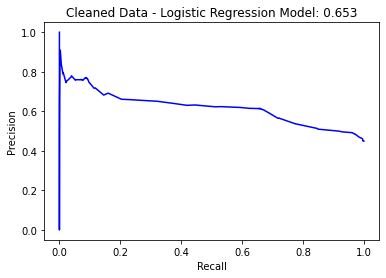

In [32]:
plt.plot(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Cleaned Data - Logistic Regression Model: {lr_score_clean}')
plt.show()

In [33]:
precision, recall, thresholds = precision_recall_curve(y_true = np.array(dt_y_true), probas_pred = np.array(dt_probas_pred)[:,1])

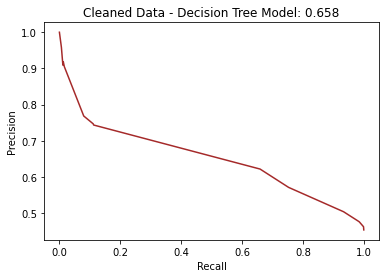

In [34]:
plt.plot(recall, precision, color='brown')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Cleaned Data - Decision Tree Model: {dt_score_clean}')
plt.show()

In [35]:
precision, recall, thresholds = precision_recall_curve(y_true = np.array(rf_y_true), probas_pred = np.array(rf_probas_pred)[:,1])

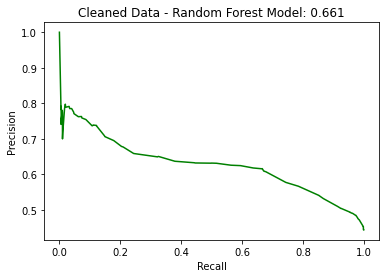

In [36]:
plt.plot(recall, precision, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Cleaned Data - Random Forest Model: {rf_score_clean}')
plt.show()

In [37]:
# pd.set_option('max_columns', None)
# big_cards.sample(1)

In [38]:
# x2 = big_cards.drop(columns = ['name', 'released_at', 'mana_cost', 'type_line', 'oracle_text', 'power', 'toughness', 'colors',
#                                'color_identity', 'keywords', 'legalities', 'games', 'finishes', 'set', 'set_name', 'set_type',
#                                'rarity', 'flavor_text', 'artist', 'edhrec_rank', 'penny_rank', 'produced_mana', 'loyalty',
#                                'card_faces', 'Tribes', 'Normal_EDH_Rank', 'Binary_Rank', 'hand_modify', 'life_modify'])

x2 = big_cards.drop(columns = 'Binary_Rank')

y2 = big_cards.loc[:, 'Binary_Rank']

In [39]:
x2 = x2.fillna(0.0)

In [40]:
lr_score_big = quick_test_afew_times(logreg, x2, y2)
lr_score_big = round(lr_score_big, 3)

In [41]:
lr_PR_results = quick_probas(logreg, x2, y2)
lr_y_true = lr_PR_results[1]
lr_probas_pred = lr_PR_results[0]

In [42]:
decisiontree = DecisionTreeClassifier(max_depth=4)
dt_score_big = quick_test_afew_times(decisiontree, x2, y2)
dt_score_big = round(dt_score_big, 3)

In [43]:
dt_PR_results = quick_probas(decisiontree, x2, y2)
dt_y_true = dt_PR_results[1]
dt_probas_pred = dt_PR_results[0]

In [44]:
randomforest = RandomForestClassifier(n_estimators=100)
rf_score_big = quick_test_afew_times(randomforest, x2, y2)
rf_score_big = round(rf_score_big, 3)

In [45]:
rf_PR_results = quick_probas(randomforest, x2, y2)
rf_y_true = rf_PR_results[1]
rf_probas_pred = rf_PR_results[0]

In [46]:
# Logistic Regression
precision, recall, thresholds = precision_recall_curve(y_true = np.array(lr_y_true), probas_pred = np.array(lr_probas_pred)[:,1])

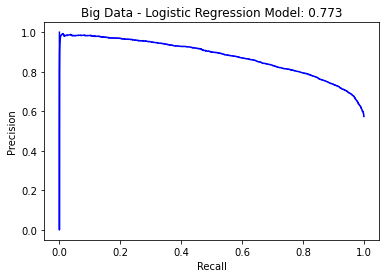

In [47]:
plt.plot(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Big Data - Logistic Regression Model: {lr_score_big}')
plt.show()

In [48]:
# Decision Tree
precision, recall, thresholds = precision_recall_curve(y_true = np.array(dt_y_true), probas_pred = np.array(dt_probas_pred)[:,1])

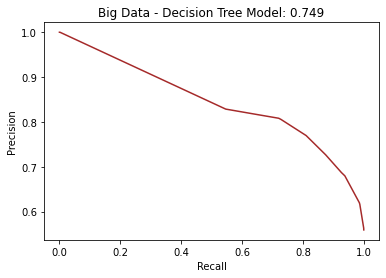

In [49]:
plt.plot(recall, precision, color='brown')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Big Data - Decision Tree Model: {dt_score_big}')
plt.show()

In [50]:
# Random Forest
precision, recall, thresholds = precision_recall_curve(y_true = np.array(rf_y_true), probas_pred = np.array(rf_probas_pred)[:,1])

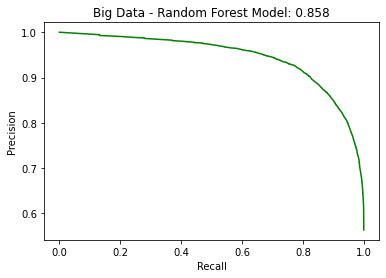

In [51]:
plt.plot(recall, precision, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Big Data - Random Forest Model: {rf_score_big}')
plt.show()

In [52]:
# trade study
# correlation threshold